In [112]:
import matplotlib.pyplot as plt
import pymysql
import seaborn as sns
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

**Check the Column Data type**

In [113]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()
# Execute the query
query = """
    SELECT COLUMN_NAME, DATA_TYPE
    FROM information_schema.COLUMNS
    WHERE TABLE_SCHEMA = 'otodom' AND TABLE_NAME = 'otodom_poland';
"""
cursor.execute(query)

14

In [114]:
# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

In [115]:
# Display the column names and data types
for row in data:
    print(f"Column: {row[0]}, Data Type: {row[1]}")

Column: advertiser_type, Data Type: text
Column: description, Data Type: text
Column: form_of_property, Data Type: text
Column: is_for_sale, Data Type: tinyint
Column: lighting, Data Type: double
Column: location, Data Type: text
Column: market, Data Type: text
Column: no_of_rooms, Data Type: bigint
Column: price, Data Type: double
Column: remote_support, Data Type: tinyint
Column: surface, Data Type: double
Column: timestamp, Data Type: text
Column: title, Data Type: text
Column: url, Data Type: text


**Check the Shape**

In [116]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query
query = """
    SELECT *
    FROM otodom_poland;
"""
cursor.execute(query)

# Fetch the data into a DataFrame
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns=columns)

# Close the database connection
db.close()

# Get the shape (number of rows and columns) of the DataFrame
shape = df.shape
print(f"Number of Rows: {shape[0]}, Number of Columns: {shape[1]}")

Number of Rows: 1000, Number of Columns: 14


**Check the duplicate**

In [117]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query
query = """
    SELECT *
    FROM otodom_poland;
"""
cursor.execute(query)

# Fetch the data into a DataFrame
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns=columns)

# Close the database connection
db.close()

# Count the number of duplicated rows
duplicates_count = df.duplicated().sum()
print(f"Number of Duplicated Rows: {duplicates_count}")

Number of Duplicated Rows: 0


**Is there is a null values in this data ? If yes then show it in the heatmap**

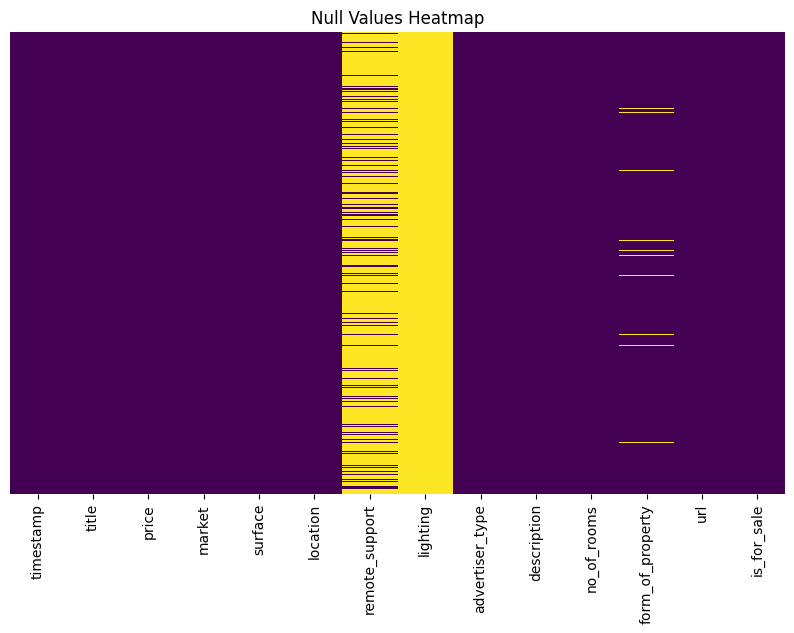

In [118]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query
query = """
    SELECT *
    FROM otodom_poland;
"""
cursor.execute(query)

# Fetch the data into a DataFrame
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns=columns)

# Close the database connection
db.close()

# Check for null values and create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Null Values Heatmap")
plt.show()

**1. What is the distribution of listings between different markets?**

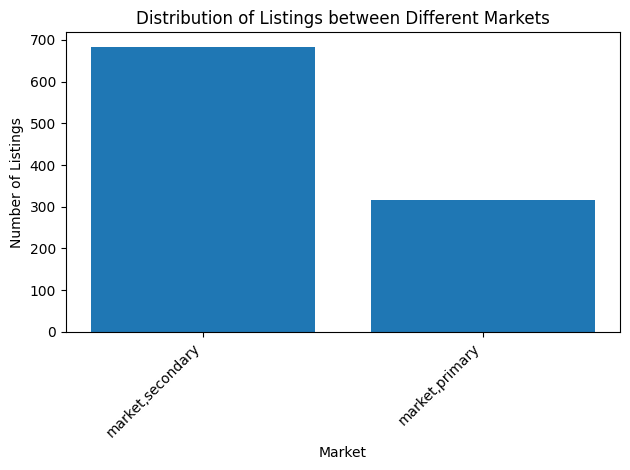

In [119]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query
query = """
    SELECT market, COUNT(*) AS listings_count
    FROM otodom_poland
    GROUP BY market
    ORDER BY listings_count DESC;
"""
cursor.execute(query)
# Fetch the data
data = cursor.fetchall()
# Close the database connection
db.close()
# Extract data for plotting
markets = [row[0] for row in data]
listings_count = [row[1] for row in data]
# Create a bar chart
plt.bar(markets, listings_count)
plt.xlabel('Market')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings between Different Markets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**2. How does the average price vary across different markets?**

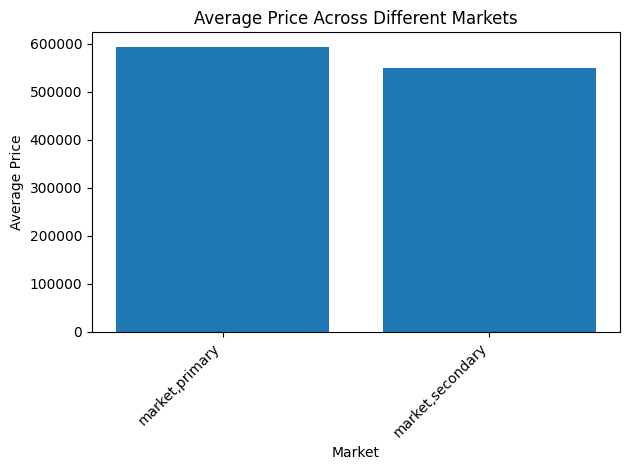

In [120]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query
query = """
    SELECT market, AVG(price) AS avg_price
    FROM otodom_poland
    GROUP BY market
    ORDER BY avg_price DESC;
"""
cursor.execute(query)
# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()
# Extract data for plotting
markets = [row[0] for row in data]
average_prices = [row[1] for row in data]
# Create a bar chart
plt.bar(markets, average_prices)
plt.xlabel('Market')
plt.ylabel('Average Price')
plt.title('Average Price Across Different Markets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3 Which locations have the highest and lowest average prices?**

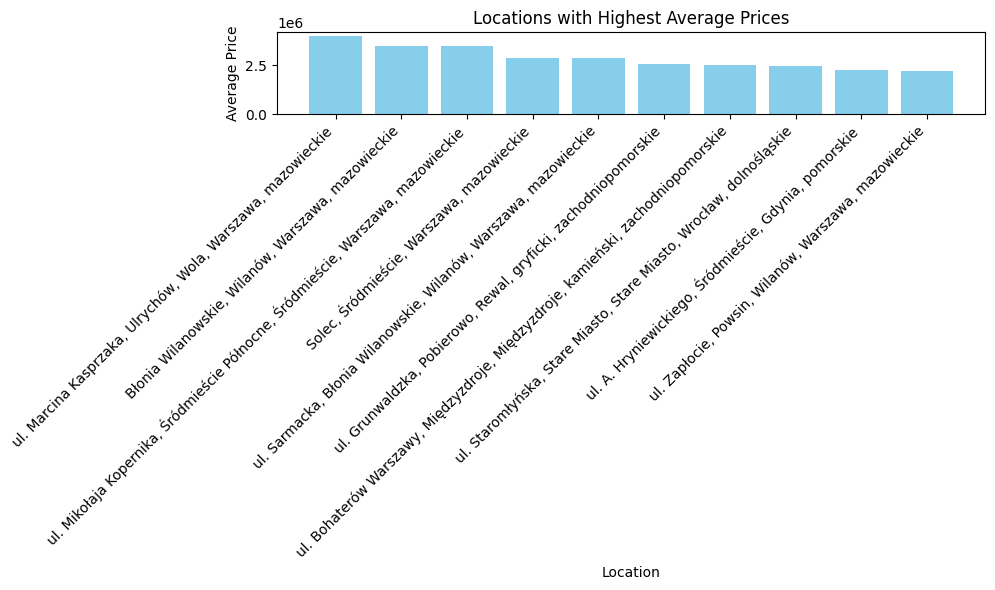

In [121]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()


# Execute the query to get average prices by location
query = """
    SELECT location, AVG(price) AS avg_price
    FROM otodom_poland
    GROUP BY location
    ORDER BY avg_price DESC;
"""
cursor.execute(query)
# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()
# Extract data for plotting
locations = [row[0] for row in data]
avg_prices = [row[1] for row in data]
# Create a bar chart for highest average prices
plt.figure(figsize=(10, 6))
plt.bar(locations[:10], avg_prices[:10], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Locations with Highest Average Prices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the first graph
plt.show()

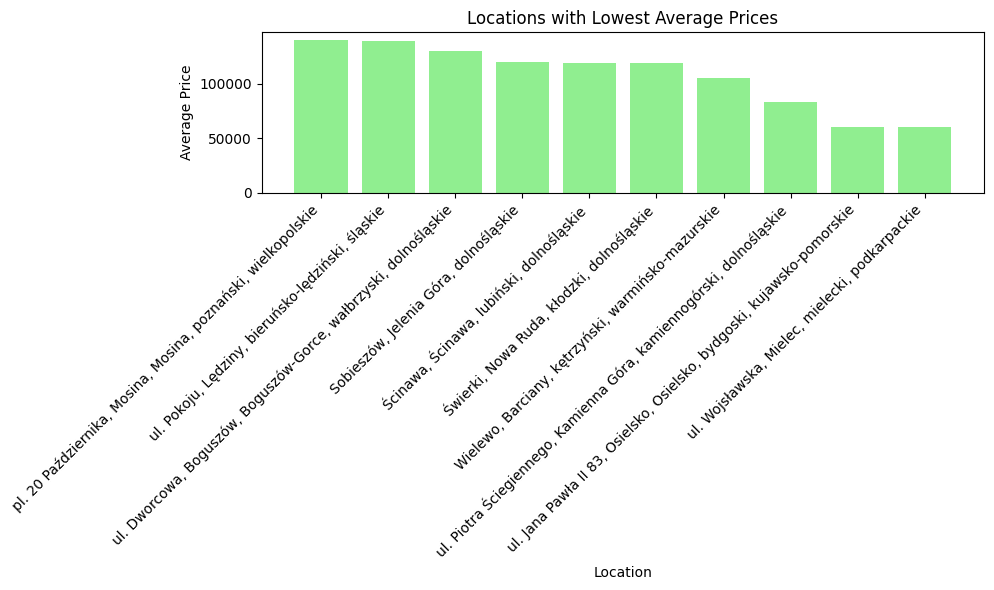

In [122]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to get average prices by location
query = """
    SELECT location, AVG(price) AS avg_price
    FROM otodom_poland
    GROUP BY location
    ORDER BY avg_price DESC;
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Extract data for plotting
locations = [row[0] for row in data]
avg_prices = [row[1] for row in data]

# Filter out None values from avg_prices
avg_prices_filtered = [price for price in avg_prices if price is not None]

# Create a bar chart for lowest average prices
plt.figure(figsize=(10, 6))
plt.bar(locations[-10:], avg_prices_filtered[-10:], color='lightgreen')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Locations with Lowest Average Prices')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the graph
plt.show()

**4 Is there a correlation between surface area and price?**

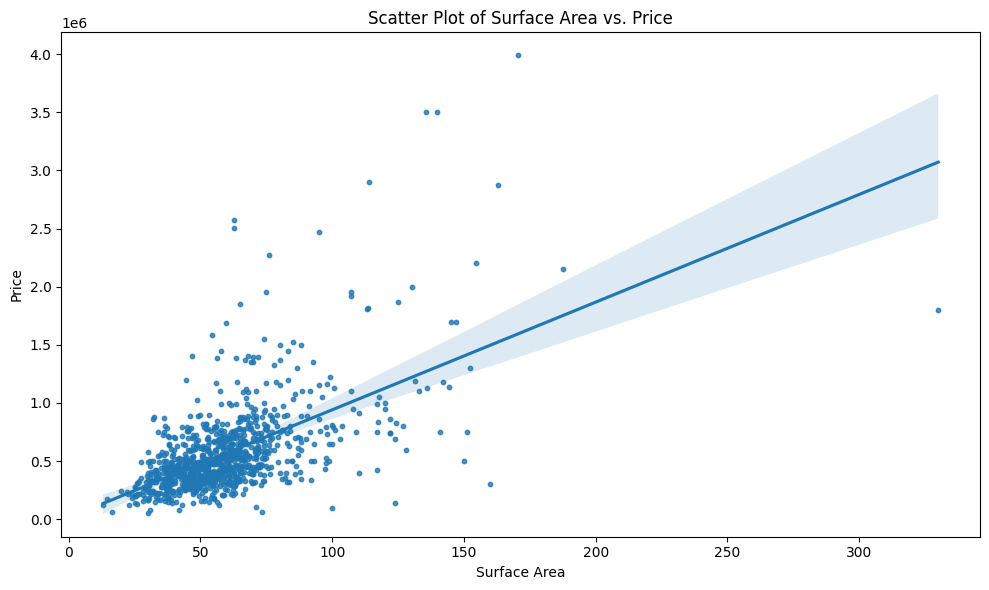

,surface,price
0,71.19,890000.0
1,122.00,862000.0
2,74.68,776672.0
3,98.60,650950.0
4,76.00,2275000.0
5,100.02,808000.0
6,48.62,1022096.0
7,74.84,789000.0
8,107.00,1099000.0
9,113.50,1816000.0


In [123]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to get surface area and price
query = """
    SELECT surface, price
    FROM otodom_poland;
"""
cursor.execute(query)

# Fetch the data into a DataFrame
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns=columns)

# Close the database connection
db.close()

# Create a scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='surface', y='price', data=df, scatter_kws={'s': 10})
plt.xlabel('Surface Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Surface Area vs. Price')
plt.tight_layout()

# Display the plot
plt.show()
df.head(10)

**5 How many listings have remote support as a feature? What's the distribution by market?**

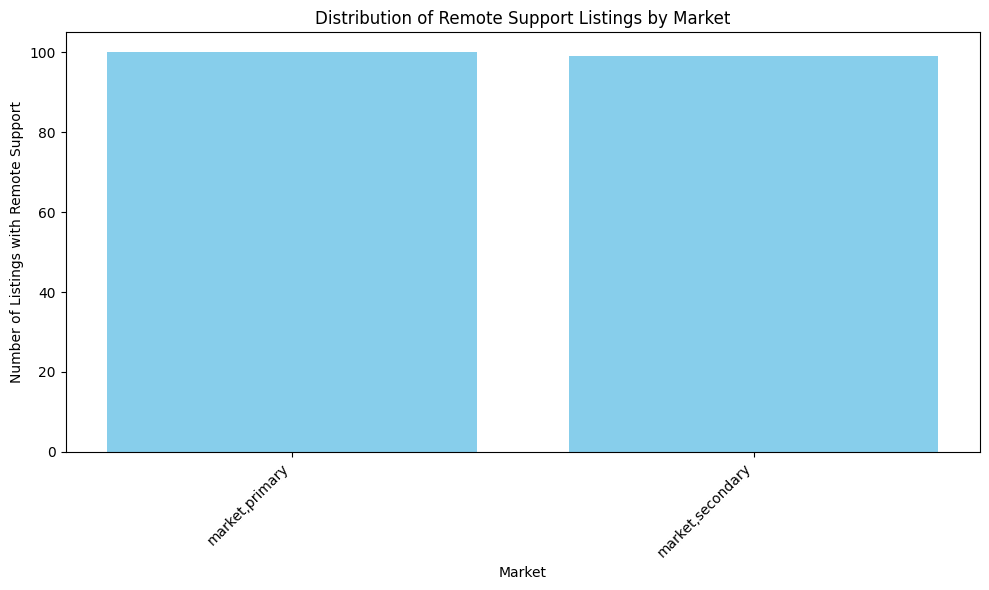

[Decimal('100'), Decimal('99')]

In [124]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to count remote support listings by market
query = """
    SELECT market, SUM(remote_support) AS remote_support_count
    FROM otodom_poland
    GROUP BY market;
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Extract data for plotting
markets = [row[0] for row in data]
remote_support_counts = [row[1] for row in data]

# Create a bar chart to show distribution of remote support by market
plt.figure(figsize=(10, 6))
plt.bar(markets, remote_support_counts, color='skyblue')
plt.xlabel('Market')
plt.ylabel('Number of Listings with Remote Support')
plt.title('Distribution of Remote Support Listings by Market')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()
remote_support_counts

**6. What are the most common advertiser types?**

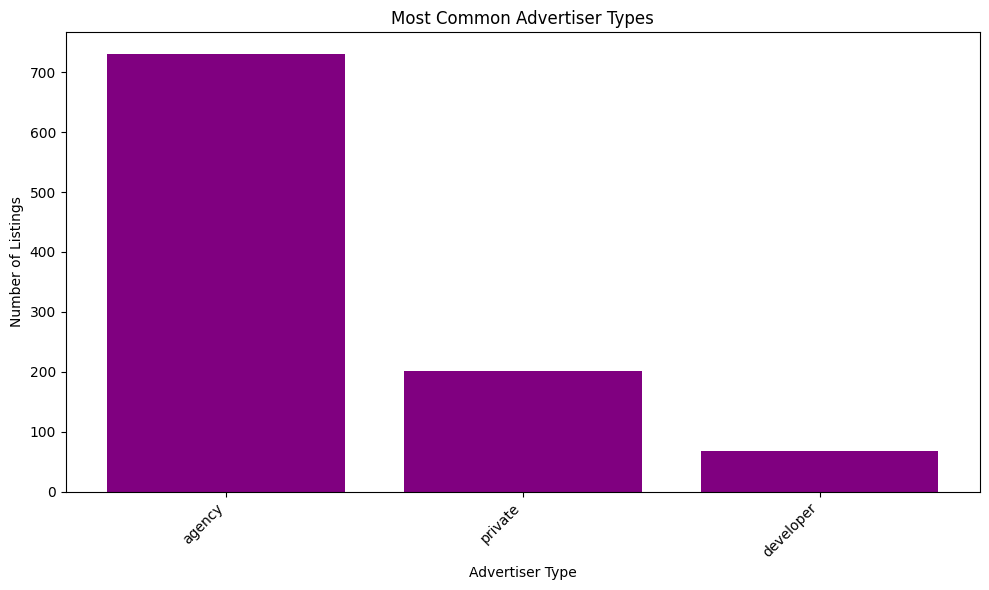

In [125]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to count advertiser types
query = """
    SELECT advertiser_type, COUNT(*) AS advertiser_count
    FROM otodom_poland
    GROUP BY advertiser_type
    ORDER BY advertiser_count DESC;
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Extract data for plotting
advertiser_types = [row[0] for row in data]
advertiser_counts = [row[1] for row in data]

# Create a bar chart to show the most common advertiser types
plt.figure(figsize=(10, 6))
plt.bar(advertiser_types, advertiser_counts, color='purple')
plt.xlabel('Advertiser Type')
plt.ylabel('Number of Listings')
plt.title('Most Common Advertiser Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

**7 How does the number of rooms relate to the price of a property?**

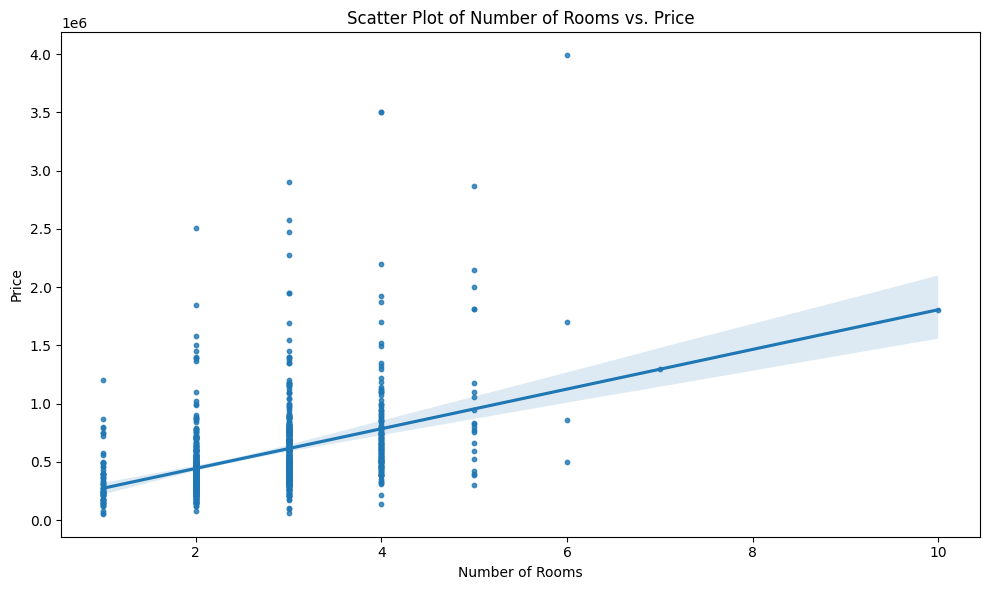

,no_of_rooms,price
0,3,890000.0
1,6,862000.0
2,5,776672.0
3,4,650950.0
4,3,2275000.0
5,3,808000.0
6,2,1022096.0
7,4,789000.0
8,5,1099000.0
9,5,1816000.0


In [126]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to get the number of rooms and price
query = """
    SELECT no_of_rooms, price
    FROM otodom_poland;
"""
cursor.execute(query)

# Fetch the data into a DataFrame
data = cursor.fetchall()
columns = [col[0] for col in cursor.description]
df = pd.DataFrame(data, columns=columns)

# Close the database connection
db.close()

# Create a scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='no_of_rooms', y='price', data=df, scatter_kws={'s': 10})
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Number of Rooms vs. Price')
plt.tight_layout()

# Display the plot
plt.show()
df.head(10)

**8 What's the distribution of different forms of property in the dataset?**

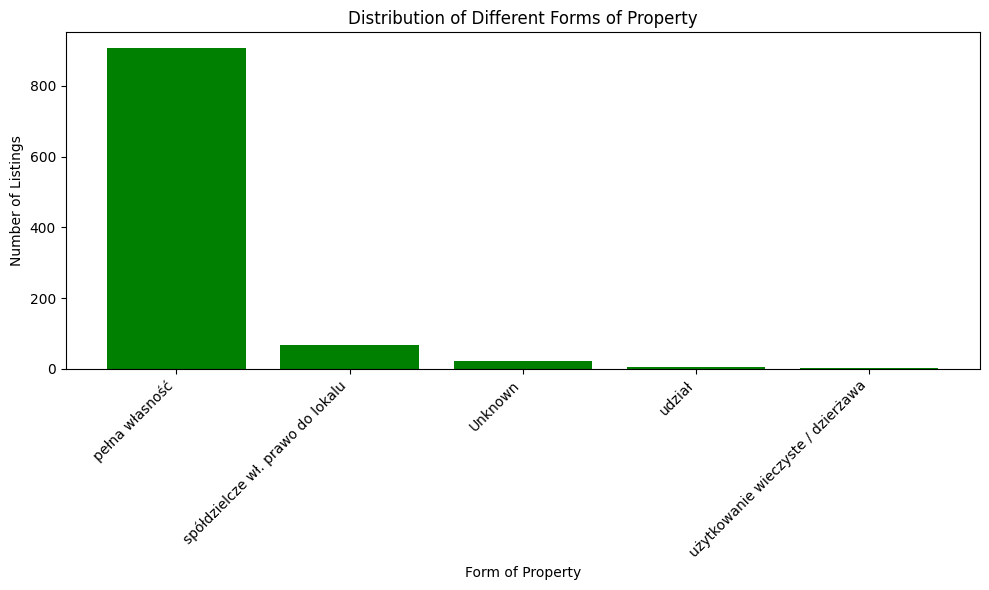

In [127]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to count different forms of property
query = """
    SELECT form_of_property, COUNT(*) AS property_count
    FROM otodom_poland
    GROUP BY form_of_property
    ORDER BY property_count DESC;
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Extract data for plotting, handling None values
property_forms = [row[0] if row[0] is not None else "Unknown" for row in data]
property_counts = [row[1] for row in data]

# Create a bar chart to show the distribution of property forms
plt.figure(figsize=(10, 6))
plt.bar(property_forms, property_counts, color='green')
plt.xlabel('Form of Property')
plt.ylabel('Number of Listings')
plt.title('Distribution of Different Forms of Property')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

**9 What's the ratio of properties for sale vs. not for sale?**

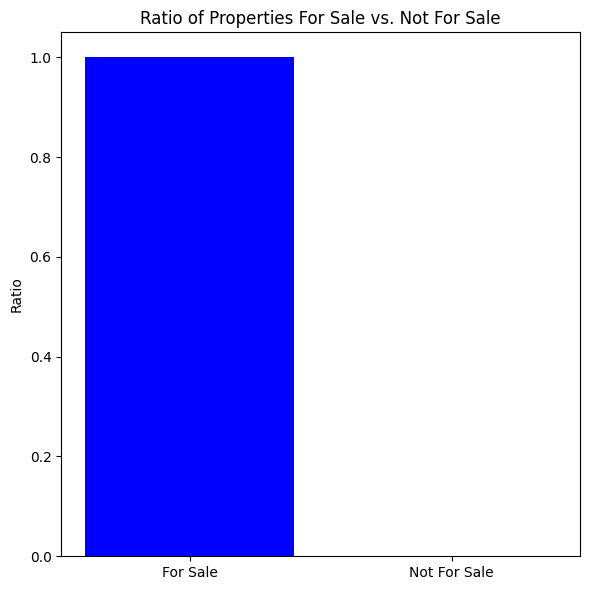

In [128]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to count properties for sale vs. not for sale
query = """
    SELECT is_for_sale, COUNT(*) AS property_count
    FROM otodom_poland
    GROUP BY is_for_sale;
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Calculate the ratio of properties for sale vs. not for sale
for_sale_count = 0
not_for_sale_count = 0

for row in data:
    if row[0] == 1:  # Property for sale
        for_sale_count = row[1]
    elif row[0] == 0:  # Property not for sale
        not_for_sale_count = row[1]

total_properties = for_sale_count + not_for_sale_count
for_sale_ratio = for_sale_count / total_properties
not_for_sale_ratio = not_for_sale_count / total_properties

# Create a bar chart to show the ratio of properties for sale vs. not for sale
labels = ['For Sale', 'Not For Sale']
ratios = [for_sale_ratio, not_for_sale_ratio]

plt.figure(figsize=(6, 6))
plt.bar(labels, ratios, color=['blue', 'orange'])
plt.ylabel('Ratio')
plt.title('Ratio of Properties For Sale vs. Not For Sale')
plt.tight_layout()

# Display the plot
plt.show()

**10 Which markets have the highest number of listings for sale?**

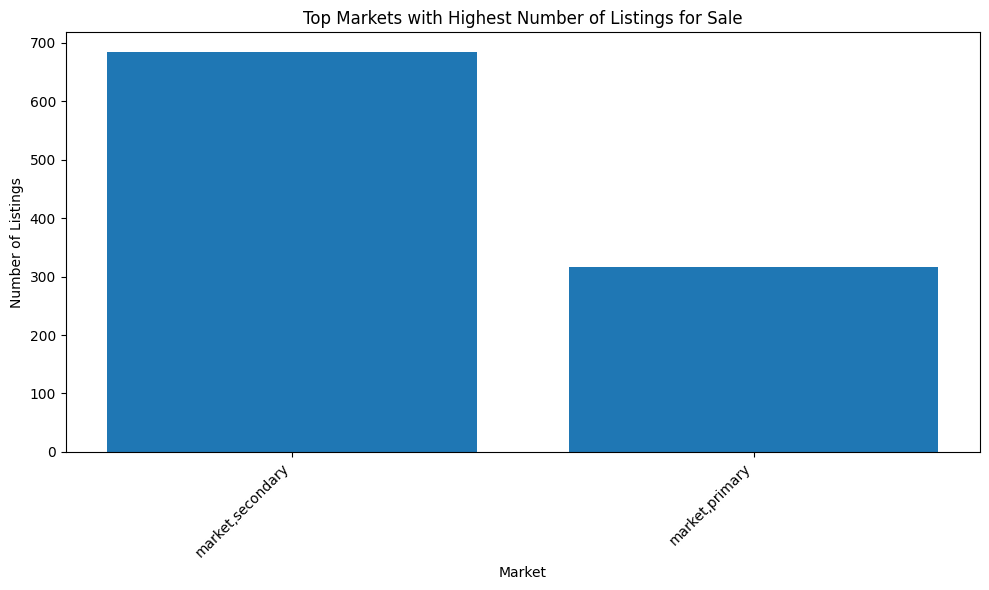

In [129]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to get markets with the highest number of listings for sale
query = """
    SELECT market, COUNT(*) AS num_listings
    FROM otodom_poland
    WHERE is_for_sale = 1
    GROUP BY market
    ORDER BY num_listings DESC
    LIMIT 10;
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=["Market", "Number_of_Listings"])

# Create a bar chart to show the markets with the highest number of listings for sale
plt.figure(figsize=(10, 6))
plt.bar(df["Market"], df["Number_of_Listings"])
plt.xlabel("Market")
plt.ylabel("Number of Listings")
plt.title("Top Markets with Highest Number of Listings for Sale")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()

**11 Are there any differences in price between properties with different forms?**

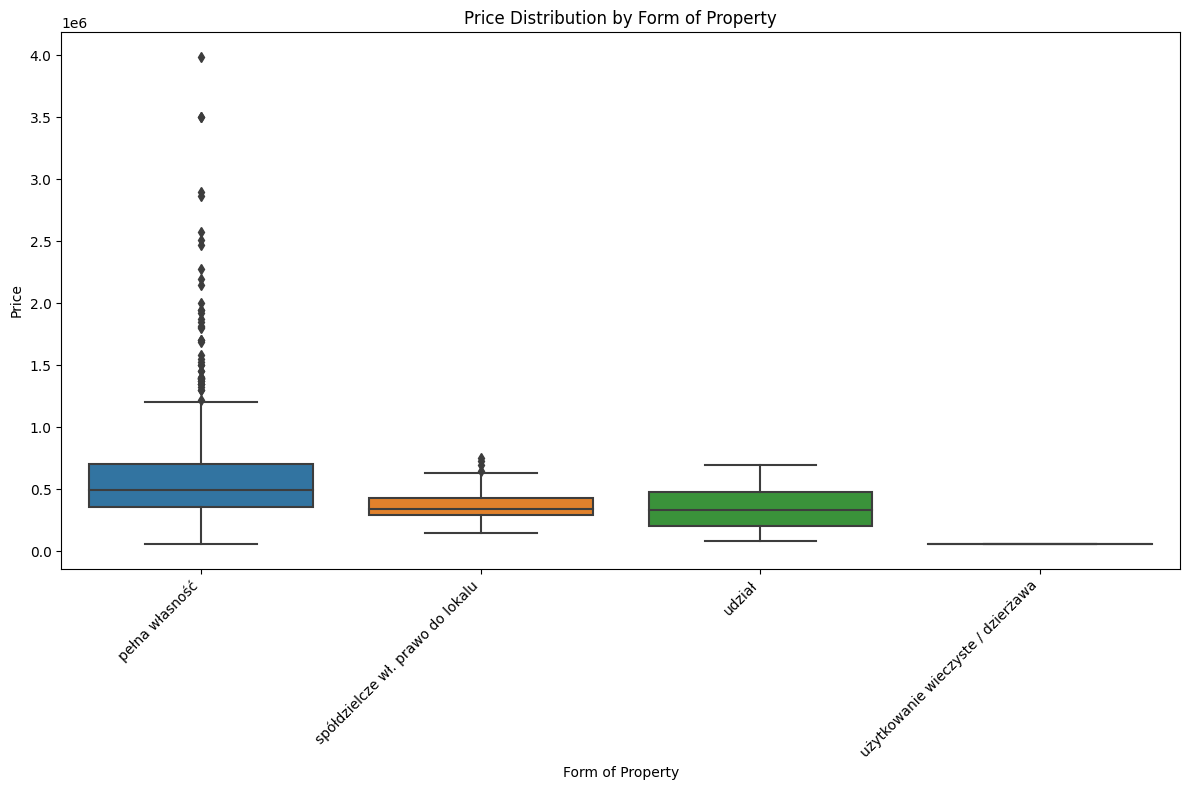

In [130]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to get the price and form of property
query = """
    SELECT price, form_of_property
    FROM otodom_poland;
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=["Price", "Form_of_Property"])

# Create box plots or violin plots using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x="Form_of_Property", y="Price", data=df)
plt.title("Price Distribution by Form of Property")
plt.xlabel("Form of Property")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()

**12 Which properties have the highest price per square meter?**

In [131]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to get the necessary data
query = """
    SELECT title, price, surface
    FROM otodom_poland;
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=["Title", "Price", "Surface"])

# Calculate price per square meter
df["Price_per_sqm"] = df["Price"] / df["Surface"]

# Sort the DataFrame by Price_per_sqm in descending order to get the highest values
df_sorted = df.sort_values(by="Price_per_sqm", ascending=False)

# Display the properties with the highest price per square meter
print(df_sorted.head())

                                                 Title      Price  Surface   
509      Luksusowy apartament TERRA - nad samym morzem  2574390.0    62.79  \
553          Apartament w Baltic Infinity Bez Prowozji  2508000.0    62.60   
428  Kamienica.Przy parku 3 i 4 piętro z antresolą ...  1401695.0    46.61   
4    Sea Towers apartament 3 pokoje taras/hala/komórka  2275000.0    76.00   
97   Całkowicie nowy apartament jeszcze nie zamiesz...  1580000.0    54.51   

     Price_per_sqm  
509   41000.000000  
553   40063.897764  
428   30072.838447  
4     29934.210526  
97    28985.507246  


**13 Are there any specific keywords in descriptions that correlate with higher prices?**

In [132]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to get the necessary data
query = """
    SELECT description, price
    FROM otodom_poland
    WHERE price IS NOT NULL;  # Filter out rows with missing prices
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=["Description", "Price"])

# Text preprocessing (you might need more advanced preprocessing steps)
df["Description"] = df["Description"].str.lower()

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed
tfidf_matrix = vectorizer.fit_transform(df["Description"])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate TF-IDF DataFrame with the original DataFrame
df = pd.concat([df, tfidf_df], axis=1)

# Prepare data for regression
X = df.drop(["Description", "Price"], axis=1)  # Features (TF-IDF)
y = df["Price"]  # Target variable

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients (importances) of TF-IDF features
coefficients = pd.Series(model.coef_, index=X.columns)

# Get keywords with highest positive coefficients
top_keywords = coefficients.nlargest(10)  # Adjust the number of top keywords

print(top_keywords)

kuchennym     959197.401391
łazienki      862089.680679
cywilnego     684915.326623
salonu        640062.496149
sypialnia     569554.937304
przynależy    530054.882399
000           525395.668935
the           449246.513478
znajdują      427318.252925
charakter     411084.246932
dtype: float64


**14 How does the distribution of property types differ between markets?**

<Figure size 1200x800 with 0 Axes>

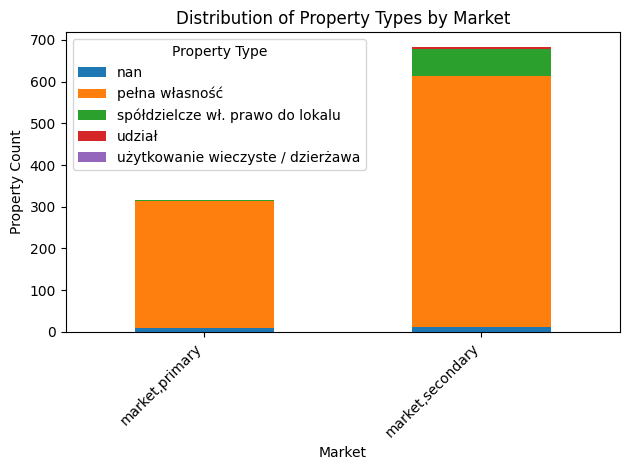

In [133]:
# Connect to the MySQL database
db = pymysql.connect(host="localhost", user="root", password="", db="otodom")
cursor = db.cursor()

# Execute the query to get the distribution of property types by market
query = """
    SELECT market, form_of_property, COUNT(*) AS property_count
    FROM otodom_poland
    GROUP BY market, form_of_property;
"""
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the database connection
db.close()

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=["Market", "Form_of_Property", "Property_Count"])

# Pivot the data for plotting
pivot_df = df.pivot(index="Market", columns="Form_of_Property", values="Property_Count")
pivot_df = pivot_df.fillna(0)  # Fill NaN values with 0

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
pivot_df.plot(kind="bar", stacked=True)
plt.title("Distribution of Property Types by Market")
plt.xlabel("Market")
plt.ylabel("Property Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.legend(title="Property Type")
plt.show()